In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/obesity-prediction/Obesity prediction.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-prediction/Obesity prediction.csv


In [2]:
display(df.head())

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
numeric = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(exclude=[np.number])

display(numeric.head())
display(categorical.head())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


,Gender,family_history,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


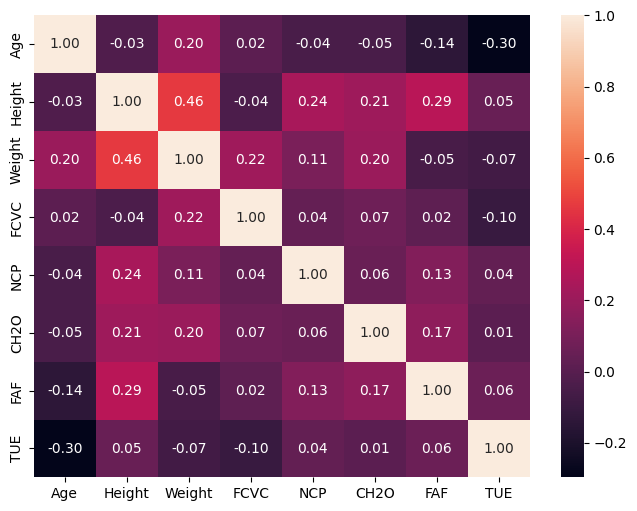

In [4]:
corr_matrix = numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [5]:
df["BMI"] = df["Weight"] / df["Height"]**2
df = df.drop(["Weight", "Height"], axis=1)
display(df["BMI"].head())

0    24.386526
1    24.238227
2    23.765432
3    26.851852
4    28.342381
Name: BMI, dtype: float64

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df[categorical.columns] = df[categorical.columns].apply(encoder.fit_transform)
display(df.head())

,Gender,Age,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,0,21.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,24.386526
1,0,21.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,24.238227
2,1,23.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,23.765432
3,1,27.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,26.851852
4,1,22.0,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,28.342381


In [7]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Obesity'], axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df['Obesity']
display(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0    1
1    1
2    1
3    5
4    6
Name: Obesity, dtype: int64

In [8]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(32, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

    model.compile(
        optimizer='adam', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model

First, let's fit the model to the original data.

In [9]:
model1 = create_model()

history = model1.fit(
    X_train, y_train, 
    validation_split=0.2, 
    epochs=150, 
    batch_size=32
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2372 - loss: 2.1454 - val_accuracy: 0.4320 - val_loss: 1.6842
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4686 - loss: 1.4322 - val_accuracy: 0.5769 - val_loss: 1.4478
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5616 - loss: 1.1994 - val_accuracy: 0.6568 - val_loss: 1.2143
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6156 - loss: 1.0775 - val_accuracy: 0.7219 - val_loss: 0.9948
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6454 - loss: 0.9734 - val_accuracy: 0.7633 - val_loss: 0.8222
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7097 - loss: 0.8588 - val_accuracy: 0.7899 - val_loss: 0.6934
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7150 - loss: 0.7850 - val_accuracy: 0.8077 - val_loss: 0.5931
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7483 - loss: 0.7102 - val_accuracy: 0.8166 - v

In [10]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9121 - loss: 0.3045 


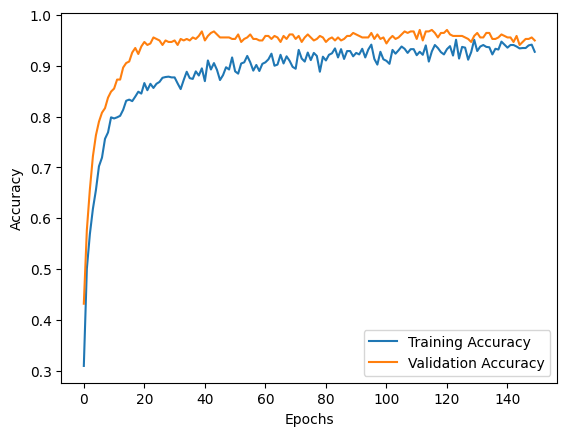

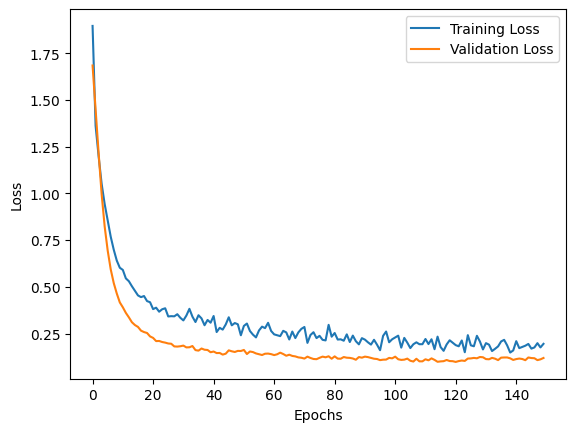

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now let's see what happens when we fit it to augmented data.

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [13]:
model2 = create_model()

history2 = model2.fit(
    X_train_resampled, y_train_resampled, 
    validation_split=0.2, 
    epochs=150, 
    batch_size=32
)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2299 - loss: 2.1676 - val_accuracy: 0.5091 - val_loss: 1.6447
Epoch 2/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5134 - loss: 1.3703 - val_accuracy: 0.5692 - val_loss: 1.3640
Epoch 3/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5955 - loss: 1.1425 - val_accuracy: 0.6736 - val_loss: 1.0995
Epoch 4/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 0.9519 - val_accuracy: 0.7911 - val_loss: 0.8915
Epoch 5/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.8991 - val_accuracy: 0.7937 - val_loss: 0.7362
Epoch 6/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7124 - loss: 0.7925 - val_accuracy: 0.8303 - val_loss: 0.6082
Epoch 7/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7533 - loss: 0.6976 - val_accuracy: 0.8512 - val_loss: 0.5202
Epoch 8/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7574 - loss: 0.6551 - val_accuracy: 0.8799 - val_loss: 0.4

In [14]:
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9139 - loss: 0.2573 


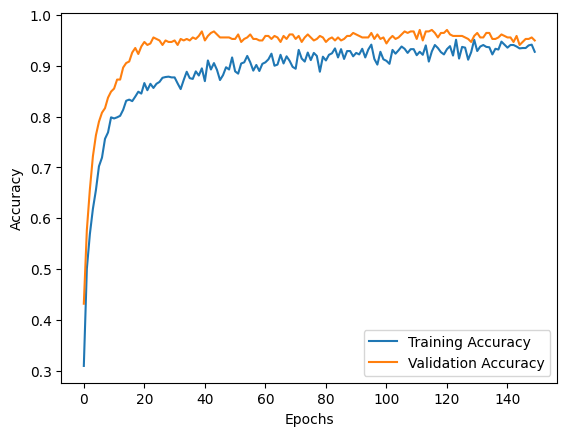

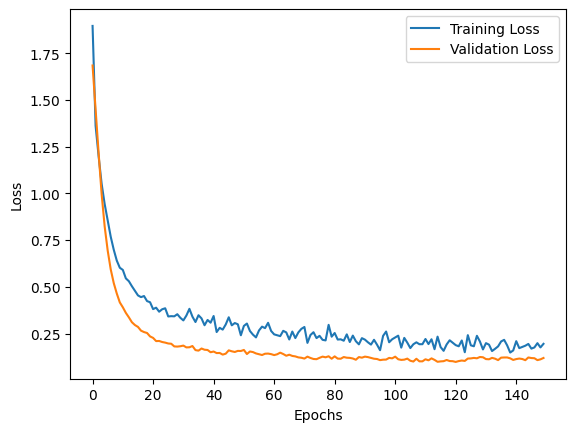

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


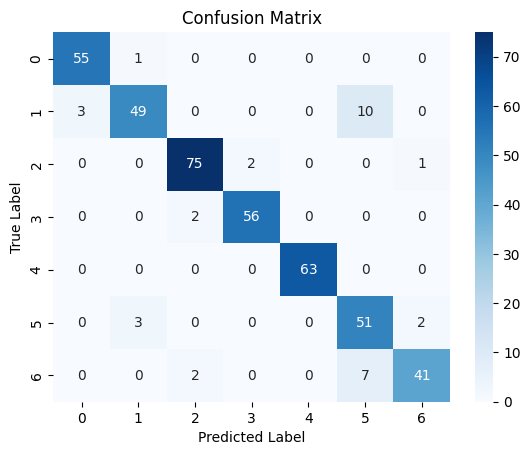

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
classes = [*np.unique(y_test)]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()